# Generate a series of hkl0 values

Tricky things
* Make sure Ei is consistent with the beam simulation
* Make sure the angles are in correct units

In [1]:
!pwd

/SNS/users/p63/notebooks/.rk-work/jnrk-sns-analysis-mcvine-unstable


In [2]:
# some goodies
# %matplotlib notebook
%matplotlib inline
from matplotlib import pyplot as plt

In [3]:
import numpy as np, os
import histogram.hdf as hh, histogram as H

In [4]:
import mcvine.cli
from mcvine_workflow.DGS import ARCS
from mcvine_workflow import singlextal as sx
from mcvine_workflow.sample import loadSampleYml
from mcvine_workflow.singlextal import io as sxio, coords_transform, dynrange
from mcvine_workflow.singlextal.resolution import use_covmat, use_res_comps

In [5]:
workdir = '/SNS/users/p63/ORNL_public_research/MCViNE_Covmat_comparison/notebooks/3-generate-samples-for-fitting'
!mkdir -p {workdir}
%cd {workdir}

/SNS/users/p63/ORNL_public_research/MCViNE_Covmat_comparison/notebooks/3-generate-samples-for-fitting


# Inputs

## Instrument

ARCS

In [6]:
instrument = use_covmat.instrument(
    name = 'ARCS',
    detsys_radius = "3.*meter",
    L_m2s = "13.6*meter",
    L_m2fc = "11.61*meter",
    offset_sample2beam = "-0.15*meter" # offset from sample to saved beam
    )
pixel = use_covmat.pixel(
    radius = "0.5*inch",
    height = "meter/128",
    pressure = "10*atm",
    )

## Sample

In [7]:
%%file Si.yml
name: Si
chemical_formula: Si2
lattice: 
 constants: 5.490700041, 5.490700041, 5.490700041, 90, 90, 90
 basis_vectors:
  - 5.490700041, 0, 0
  - 0, 5.490700041, 0
  - 0, 0, 5.490700041
 primitive_basis_vectors:
  - 0.0, 2.71526503565, 2.71526503565
  - 2.71526503565, 0.0, 2.71526503565
  - 2.71526503565, 2.71526503565, 0.0
excitations:
  - type: DGSresolution
orientation:
 u: -1, 1, -1
 v: 2, 1, -1
shape: hollowCylinder in_radius="5./8*inch" out_radius="1.*inch" height="1.5*inch"
temperature: 100*K

Writing Si.yml


In [8]:
sample_yml = './Si.yml'

## ** Dynamics parameters

In [9]:
# Ei = 100
q = 0
# E = 20.  # energy transfer

In [10]:
xo = sxio.loadXtalOriFromSampleYml('Si.yml')
# change psi if needed
# xo.psi = np.deg2rad(30.)
# print np.rad2deg(xo.psi)

## Compute hkl0

In [11]:
# Beam simulations by Ricky
!ls /SNS/users/p63/ORNL_public_research/MCViNE_Covmat_comparison/mcvine_resolution/beams

beam_1000      beam_125_1e9  beam_30	  beam_500_1e9
beam_1000_1e9  beam_250      beam_30_1e9  beam_60
beam_125       beam_250_1e9  beam_500	  beam_60_1e9


In [12]:
Eis = [30, 60, 125, 250, 500, 1000]
NEis = len(Eis)

# Do One Ei first

In [13]:
np.random.random()

0.8286980236504258

In [14]:
Ei = 1000

N_samples = 10
theta_min = -5
theta_max = 120
thetas = np.random.random(N_samples)*(theta_max-theta_min) + theta_min

z_min = -1
z_max = 1.
zs = np.random.random(N_samples)*(z_max-z_min) + z_min

E_min = -Ei*.95
E_max = Ei*.95
Es = np.random.random(N_samples)*(E_max-E_min) + E_min

rs = np.ones(N_samples)*3. # radius of the cylinder of the det system
print zs
print thetas
print Es

hkl0s = coords_transform.rtzE2hkl(r=rs, theta=np.deg2rad(thetas), z=zs, E=Es, xtalori=xo, Ei=Ei)
print hkl0s

[-0.47690292 -0.79327394  0.50436713 -0.06411085  0.2036706   0.89388316
 -0.80719883  0.82102801  0.72872252 -0.7933586 ]
[ 83.46229659  60.95041245  47.28506359   2.11379204  32.76354049
  29.72521307  -2.03122867  38.60641514   5.20403092  77.39082429]
[-940.3357965     6.7196957  -323.84366835   12.98186848 -772.99326197
 -727.28582972 -105.84279783 -692.13694281  893.77314064 -416.88070174]
[[-30.77053674  -4.33257929  -1.60464016]
 [-19.10087676  -4.16179269  -2.75520002]
 [-15.62007381  -1.39168323   6.57069046]
 [ -0.65642979  -0.49307836  -0.0831955 ]
 [ -9.97075477  -5.70846565   8.15706251]
 [ -8.74958335  -0.83982811  11.02871132]
 [  0.72860767  -3.59132617  -3.82661603]
 [-12.48772268  -1.25803408  10.58039554]
 [ -8.0379875    8.40688934  -6.31824498]
 [-25.90195658  -4.6331761   -3.62894129]]


In [15]:
hkl_dir = np.array([0,0,1]) # this could be randomized too
hkls = hkl0s+q*hkl_dir

In [16]:
# hklE array
print np.hstack((hkls, Es[:, np.newaxis]))

[[ -3.07705367e+01  -4.33257929e+00  -1.60464016e+00  -9.40335796e+02]
 [ -1.91008768e+01  -4.16179269e+00  -2.75520002e+00   6.71969570e+00]
 [ -1.56200738e+01  -1.39168323e+00   6.57069046e+00  -3.23843668e+02]
 [ -6.56429792e-01  -4.93078363e-01  -8.31954995e-02   1.29818685e+01]
 [ -9.97075477e+00  -5.70846565e+00   8.15706251e+00  -7.72993262e+02]
 [ -8.74958335e+00  -8.39828112e-01   1.10287113e+01  -7.27285830e+02]
 [  7.28607668e-01  -3.59132617e+00  -3.82661603e+00  -1.05842798e+02]
 [ -1.24877227e+01  -1.25803408e+00   1.05803955e+01  -6.92136943e+02]
 [ -8.03798750e+00   8.40688934e+00  -6.31824498e+00   8.93773141e+02]
 [ -2.59019566e+01  -4.63317610e+00  -3.62894129e+00  -4.16880702e+02]]


** we have not randomize psi angles yet. could be done **

## ** Other parameters

In [17]:
# scan
class psi_scan:
    min = -5
    max = 90.
    step = 1.

# Setup simulations

In [18]:
!rm -rf tmp.use_res_comps/
!mkdir -p tmp.use_res_comps/

In [19]:
outdir = 'tmp.use_res_comps'
beam = '/SNS/users/p63/ORNL_public_research/MCViNE_Covmat_comparison/mcvine_resolution/beams/beam_1000_1e9/'
for E, hkl in zip(Es, hkls):
    print E,hkl
    outdir1 = os.path.join(outdir, 'E%s_hkl%s' % (E, '%s,%s,%s' % tuple(hkl)))
    use_res_comps.setup(outdir1, sample_yml, beam, E, hkl, hkl_dir, psi_scan, instrument, pixel)

-940.3357965 [-30.77053674  -4.33257929  -1.60464016]
Ei=1010.94552405, t0=5.03711447572


/SNS/software/miniconda2/envs/mcvine-unstable/share/mcvine/workflow/mcvine_workflow/singlextal/solve_psi.py:55: UserWarning: Traceback (most recent call last):
  File "/SNS/software/miniconda2/envs/mcvine-unstable/share/mcvine/workflow/mcvine_workflow/singlextal/solve_psi.py", line 52, in solve
    results.append(solver(res, min, max))
  File "/SNS/software/miniconda2/envs/mcvine-unstable/lib/python2.7/site-packages/scipy/optimize/zeros.py", line 442, in brentq
    r = _zeros._brentq(f,a,b,xtol,rtol,maxiter,args,full_output,disp)
ValueError: f(a) and f(b) must have different signs

  warnings.warn(tb.format_exc())


Computed:
* psi=-0.191719400203 degree
* Q=[ 18.42662873 -30.08649004   4.80419087]
* hkl2Qmat=[[ -6.57550419e-01   9.36548887e-01   7.76165047e-17]
 [  6.62240069e-01   4.64958360e-01  -8.09165116e-01]
 [ -6.62240069e-01  -4.64958360e-01  -8.09165116e-01]]
* ki=22.0879917858
* vectors ki=[ 22.08799179   0.           0.        ], kf=[  3.66136305  30.08649004  -4.80419087]
These two numbers should be very close:
  -940.3357965
  -940.3357965
  Ei=1010.94552405, Ef=1951.28132055
* Ef=1951.28132055
* pixel positon=[ 0.36241006  2.97802937 -0.47552976]
* pixel_position=[ 0.36241006  2.97802937 -0.47552976]
t_m2s=0.000982956131398, t_s2p=0.000157209094954, t_m2p=0.00114016522635
6.7196957037 [-19.10087676  -4.16179269  -2.75520002]
Ei=1010.94552405, t0=5.03711447572
Computed:
* psi=-0.196279161234 degree
* Q=[ 11.62681176 -18.54383725   5.59698921]
* hkl2Qmat=[[ -6.57475884e-01   9.36601214e-01  -7.76121684e-17]
 [  6.62277069e-01   4.64905656e-01  -8.09165116e-01]
 [ -6.62277069e-01  -4.6

In [20]:
ls tmp.use_res_comps/

E-105.842797827_hkl0.728607667739,-3.59132617053,-3.82661603247/
E12.9818684844_hkl-0.656429792334,-0.493078362965,-0.0831954995442/
E-323.843668347_hkl-15.6200738105,-1.39168323049,6.5706904573/
E-416.880701737_hkl-25.9019565755,-4.63317610171,-3.62894128981/
E6.7196957037_hkl-19.1008767624,-4.16179268643,-2.75520001804/
E-692.136942809_hkl-12.4877226777,-1.25803408259,10.580395539/
E-727.285829721_hkl-8.74958335105,-0.839828112254,11.0287113159/
E-772.99326197_hkl-9.97075477125,-5.7084656489,8.15706250536/
E893.773140638_hkl-8.03798750389,8.40688933751,-6.31824498238/
E-940.3357965_hkl-30.7705367397,-4.33257929438,-1.60464016031/


In [22]:
%%time
%%script bash
cd tmp.use_res_comps/E-105.842797827_hkl0.728607667739,-3.59132617053,-3.82661603247/
python run.py

weight:  1.0
0-60994: ..........
Done.


/SNS/software/miniconda2/envs/mcvine-unstable/lib/python2.7/site-packages/mcni/SimulationContext.py:39: UserWarning: output directory was not set
  warnings.warn("output directory was not set")


CPU times: user 5.22 ms, sys: 8.28 ms, total: 13.5 ms
Wall time: 15.5 s


In [27]:
!pwd
!ls
%cd tmp.use_res_comps
!ls
%cd E-105.842797827_hkl0.728607667739,-3.59132617053,-3.82661603247/

/SNS/users/p63/ORNL_public_research/MCViNE_Covmat_comparison/notebooks/3-generate-samples-for-fitting/tmp.use_res_comps
E-105.842797827_hkl0.728607667739,-3.59132617053,-3.82661603247
E12.9818684844_hkl-0.656429792334,-0.493078362965,-0.0831954995442
E-323.843668347_hkl-15.6200738105,-1.39168323049,6.5706904573
E-416.880701737_hkl-25.9019565755,-4.63317610171,-3.62894128981
E6.7196957037_hkl-19.1008767624,-4.16179268643,-2.75520001804
E-692.136942809_hkl-12.4877226777,-1.25803408259,10.580395539
E-727.285829721_hkl-8.74958335105,-0.839828112254,11.0287113159
E-772.99326197_hkl-9.97075477125,-5.7084656489,8.15706250536
E893.773140638_hkl-8.03798750389,8.40688933751,-6.31824498238
E-940.3357965_hkl-30.7705367397,-4.33257929438,-1.60464016031
[Errno 2] No such file or directory: 'tmp.use_res_comps'
/SNS/users/p63/ORNL_public_research/MCViNE_Covmat_comparison/notebooks/3-generate-samples-for-fitting/tmp.use_res_comps
E-105.842797827_hkl0.728607667739,-3.59132617053,-3.82661603247
E12.98186

In [30]:
!pwd
!ls
res = hh.load('res.h5')

/SNS/users/p63/ORNL_public_research/MCViNE_Covmat_comparison/notebooks/3-generate-samples-for-fitting/tmp.use_res_comps/E-105.842797827_hkl0.728607667739,-3.59132617053,-3.82661603247
dEs.npy  dhkls.npy  dxs.npy  probs.npy	res.h5	run.py	sample


/SNS/software/miniconda2/envs/mcvine-unstable/lib/python2.7/site-packages/histogram/hdf/Loader.py:129: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'storage' in list(dataGroup): # this uses the 'storage' convention


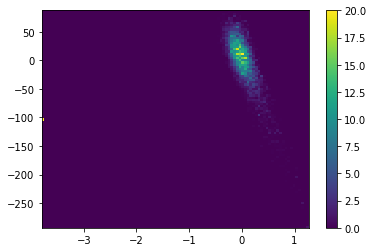

In [39]:
q = res.x
E = res.E
dE = E[1]-E[0]
dq = q[1]-q[0]
Eg, qg = np.mgrid[slice(E[0], E[-1]+dE/2, E[1]-E[0]), slice(q[0], q[-1]+dq/2, q[1]-q[0])]

# plt.figure(figsize=(4,6))
plt.pcolormesh(qg, Eg, res.I.T, cmap='viridis')
plt.clim(0, 20)
#plt.xlim(-0.4,0.2)
#plt.ylim(-10,7)
plt.colorbar()